In [17]:
from numpy import *
%matplotlib notebook
from matplotlib.pyplot import *
import audio.wave
from IPython.display import Audio

In [5]:
T = 3.0
df = 44100
dt = 1.0 / 44100
f = 440.0

In [3]:
t = r_[0.0:T:dt]
t

array([0.00000000e+00, 2.26757370e-05, 4.53514739e-05, ...,
       2.99993197e+00, 2.99995465e+00, 2.99997732e+00])

In [6]:
x = sin(2*pi*f*t)

In [15]:
v = r_[0:10]
v < 5

array([ True,  True,  True,  True,  True, False, False, False, False,
       False])

In [9]:
tf = t[t < 20 / 1000.0] # 20 ms
xf = x[t < 20 / 1000.0]

<IPython.core.display.Javascript object>


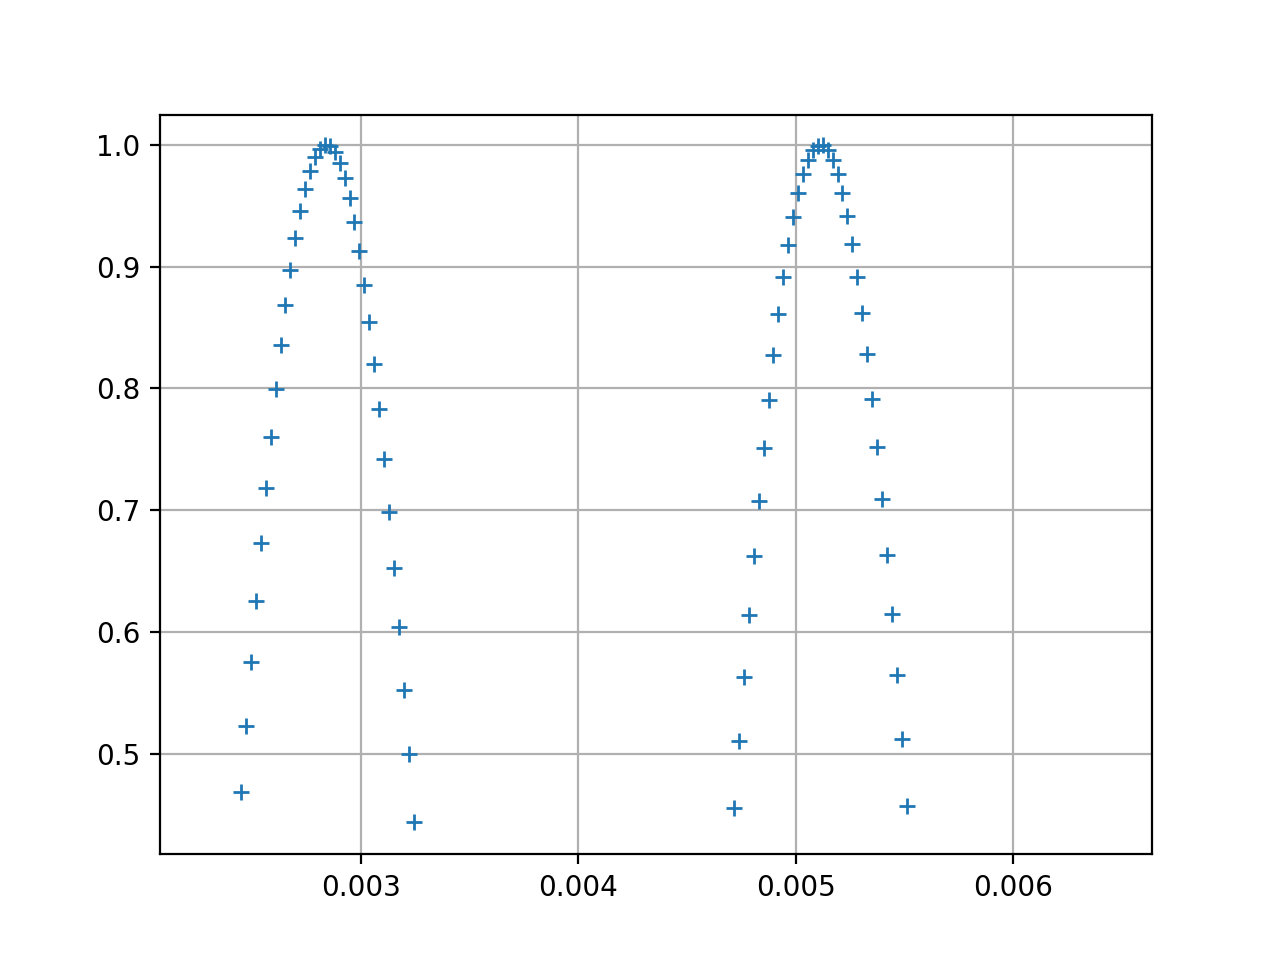

In [12]:
fig, axes = subplots()
axes.plot(tf, xf, "+")
axes.grid()

In [27]:
audio.wave.write(10*x, "A4.wav")
Audio("A4.wav")

In [28]:
def make_tone(n=4):
    f = 440.0 * 2 ** (n - 4)
    x = sin(2*pi*f*t)
    filename = "A" + str(n) + ".wav"
    audio.wave.write(x, filename)
    return x

In [32]:
for i in range(0,11):
    x = make_tone(i)
    display(mean(x * x), 27.5 * 2 ** i)
    display(Audio("A" + str(i) + ".wav"))


0.5

27.5

0.5

55.0

0.5

110.0

0.4999999999999999

220.0

0.4999999999999999

440.0

0.5

880.0

0.4999999999999998

1760.0

0.5000000000000001

3520.0

0.5

7040.0

0.5000000000000003

14080.0

0.5000000000000026

28160.0

In [41]:
x = make_tone(n=20)
Audio("A20.wav")

<IPython.core.display.Javascript object>


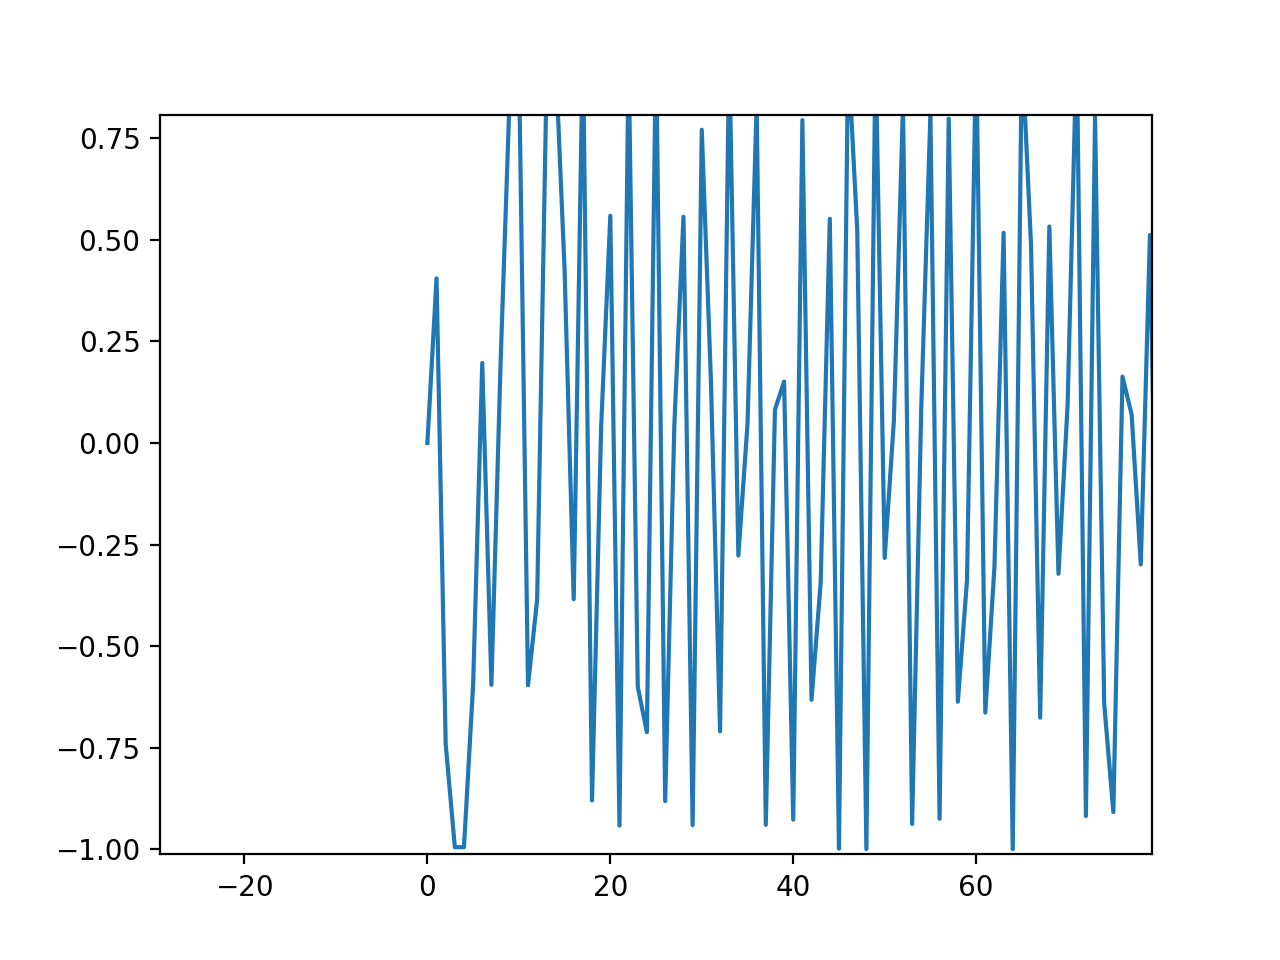

In [39]:
27.5 * (2 ** 100)
f, a = subplots()
a.plot(x)

<IPython.core.display.Javascript object>


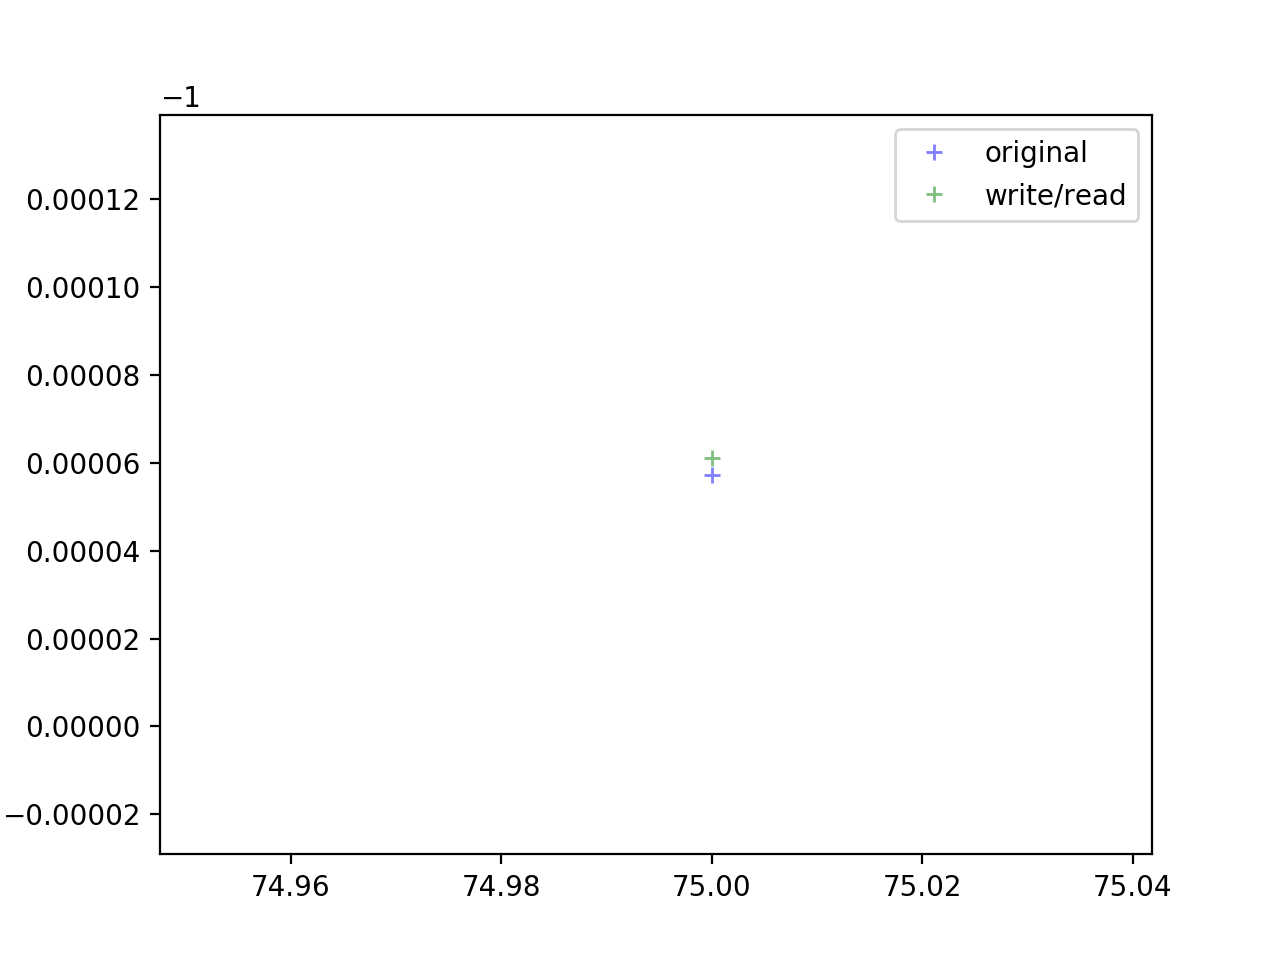

In [48]:
A4 = make_tone(n=4)
A4q = audio.wave.read("A4.wav")[0]
fig, axes = subplots()
axes.plot(A4[:512], "b+", alpha=0.5, label="original")
axes.plot(A4q[:512], "g+", alpha=0.5, label="write/read")
axes.legend()

In [49]:
mean(abs(A4 - A4q))

7.62163715695231e-06

In [51]:
raw = open("A4.wav").read()
raw[:512]

'RIFF\xbc\t\x04\x00WAVEfmt \x10\x00\x00\x00\x01\x00\x01\x00D\xac\x00\x00\x88X\x01\x00\x02\x00\x10\x00data\x98\t\x04\x00\x00\x00\x05\x08\x02\x10\xee\x17\xc3\x1fx\'\x05/b6\x89=rD\x17KpQvW%]vbeg\xebk\x04p\xads\xe2v\x9fy\xe2{\xa8}\xf0~\xb8\x7f\xff\x7f\xc7\x7f\r\x7f\xd4}\x1c|\xe7y8w\x11tuphl\xeeg\x0bc\xc5] X#R\xd3K7EV>57\xdd/U(\xa5 \xd4\x18\xe9\x10\xee\x08\xe9\x00\xe4\xf8\xe6\xf0\xf7\xe8\x1f\xe1g\xd9\xd5\xd1q\xcaD\xc3S\xbc\xa7\xb5E\xaf5\xa9{\xa3\x1f\x9e&\x99\x93\x94m\x90\xb7\x8cu\x89\xaa\x86Z\x84\x85\x82/\x81X\x80\x02\x80,\x80\xd7\x80\x02\x82\xac\x83\xd2\x85t\x88\x8e\x8b\x1d\x8f\x1d\x93\x8b\x97b\x9c\x9d\xa17\xa7*\xadq\xb3\x05\xba\xdf\xc0\xf8\xc7J\xcf\xcd\xd6z\xdeH\xe60\xee)\xf6-\xfe3\x062\x0e#\x16\xfe\x1d\xbb%Q-\xba4\xee;\xe6B\x9bI\x05P\x1fV\xe3[JaOf\xedj o\xe3r2v\x0byi{L}\xb1~\x96\x7f\xfb\x7f\xdf\x7fC\x7f&~\x8b|rz\xdfw\xd3tQq]m\xfbh0d\x00_qY\x87SIM\xbeF\xec?\xd98\x8d1\x0f*g"\x9d\x1a\xb7\x12\xbf\n\xbc\x02\xb6\xfa\xb6\xf2\xc3\xea\xe5\xe2%\xdb\x89\xd3\x1b\xcc\xe0\xc4\xe1\xbd%\xb7\xb1\xb0\x8e\

In [62]:
from bitstream import *
import warnings; warnings.simplefilter('ignore', DeprecationWarning)
stream = BitStream(raw[:512])
print stream.read(str, 4)
_ = stream.read(str, 4)
print stream.read(str, 4)
print stream.read(str, 4)
_ = stream.read(str, 6)
print stream.read(uint16).newbyteorder() # LE <-> BE
print stream.read(uint32).newbyteorder()

RIFF
WAVE
fmt 
1
44100
